In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,NaN,3.0,1.4,NaN
2,NaN,3.2,1.3,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,NaN,3.0,5.2,NaN
148,NaN,3.4,5.4,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	57
float64		column 2	0
float64		column 3	0
float64		column 4	57


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,93.000000,150.000000,150.000000,93.000000
mean,5.858065,3.054000,3.758667,1.195699
std,0.778002,0.433594,1.764420,0.674201
min,4.400000,2.000000,1.000000,0.200000
25%,5.400000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.600000
max,7.700000,4.400000,6.900000,2.400000


<AxesSubplot:>

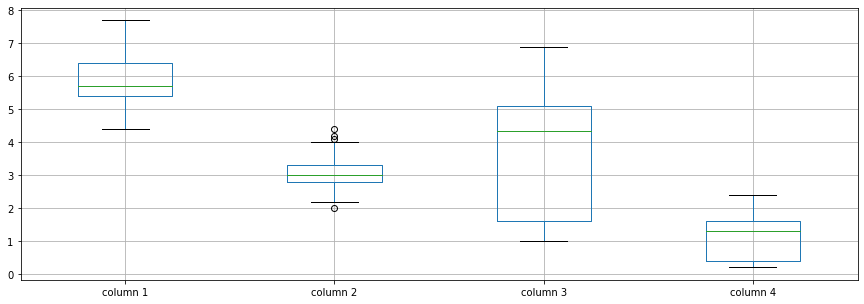

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.858065
column 2    3.054000
column 3    3.758667
column 4    1.195699
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.123443,0.858976,0.803271
column 2,-0.123443,1.000000,-0.420516,-0.404497
column 3,0.858976,-0.420516,1.000000,0.956481
column 4,0.803271,-0.404497,0.956481,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [4,4+66,4+66+66,4+66+66+66,4+66+66+66+66,4+66+66+66,4+66+66,4+66,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.691024992201063
Epoch: 1 , loss: 11.645079930623373
Epoch: 2 , loss: 11.770648850335014
Epoch: 3 , loss: 11.57104418012831
Epoch: 4 , loss: 11.734752125210232
Epoch: 5 , loss: 11.8406646516588
Epoch: 6 , loss: 11.734889878167046
Epoch: 7 , loss: 11.698038736979166
Epoch: 8 , loss: 11.761699782477486
Epoch: 9 , loss: 11.670485072665745
Epoch: 10 , loss: 11.470516840616861
Epoch: 11 , loss: 11.652629110548231
Epoch: 12 , loss: 11.724618169996473
Epoch: 13 , loss: 11.678378211127388
Epoch: 14 , loss: 11.550606727600098
Epoch: 15 , loss: 11.66335678100586
Epoch: 16 , loss: 11.628067334493002
Epoch: 17 , loss: 11.633956167432997
Epoch: 18 , loss: 11.656499756707085
Epoch: 19 , loss: 11.732138421800402
Epoch: 20 , loss: 11.772817823621962
Epoch: 21 , loss: 11.653211699591743
Epoch: 22 , loss: 11.544366306728786
Epoch: 23 , loss: 11.647401491800943
Epoch: 24 , loss: 11.62763457828098
Epoch: 25 , loss: 11.68

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.0,0.0,0.000000
1,-4.886452,0.0,0.0,-0.188212
2,-2.533982,0.0,0.0,0.498391
3,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.000000
...,...,...,...,...
145,0.000000,0.0,0.0,0.000000
146,0.000000,0.0,0.0,0.000000
147,-3.140903,0.0,0.0,-0.810794
148,-3.015608,0.0,0.0,-1.208885


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(36.09461983078987, 97.653468960401)

In [29]:
NRMS=numerator/denominator
NRMS


0.36961943303239364

In [30]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.5,1.4,0.200000
1,0.013548,3.0,1.4,0.011788
2,2.166018,3.2,1.3,0.698391
3,4.600000,3.1,1.5,0.200000
4,5.000000,3.6,1.4,0.200000
...,...,...,...,...
145,6.700000,3.0,5.2,2.300000
146,6.300000,2.5,5.0,1.900000
147,3.359097,3.0,5.2,1.189206
148,3.184392,3.4,5.4,1.091115


In [32]:
imputations[-1].to_excel("Iris_AL_20(imp).xlsx", index=False, header=False)